In [21]:
from datasets import load_dataset
import pandas as pd
import re
import nltk
import  matplotlib.pyplot as plt

In [3]:
from nltk.tokenize import word_tokenize, RegexpTokenizer, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [4]:
stop_words = stopwords.words("english")
stop_words.append('br')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
from yellowbrick.cluster import KElbowVisualizer

In [7]:
tokenizer = RegexpTokenizer(r"\w+")

In [8]:
data = load_dataset("imdb",split="train")

Reusing dataset imdb (/home/sasha/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)


In [9]:
datadf = pd.json_normalize(data)

In [10]:
datadf.head()

,text,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [11]:
sents=datadf.text.tolist()
sents=sents[:500]

In [12]:
sents[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [22]:
vectorizer = CountVectorizer(analyzer = 'word', preprocessor=None, lowercase=True, tokenizer=None, stop_words=stop_words)  

In [14]:
X = vectorizer.fit_transform(sents)
words = vectorizer.get_feature_names()

In [15]:
#setup kmeans clustering
kmeans = KMeans(n_clusters = 5, n_init = 17,  tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(X)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


0 : film, movie, one, story, good, like, well, great, time, see
1 : titanic, rose, movie, ship, time, jack, film, class, cal, voyage
2 : film, one, time, great, like, story, films, well, also, would
3 : movie, one, like, film, good, movies, see, story, love, people
4 : bruce, film, movie, like, see, man, god, one, carrey, life


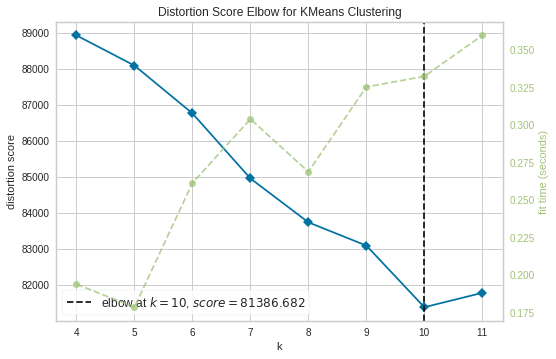

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#from https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

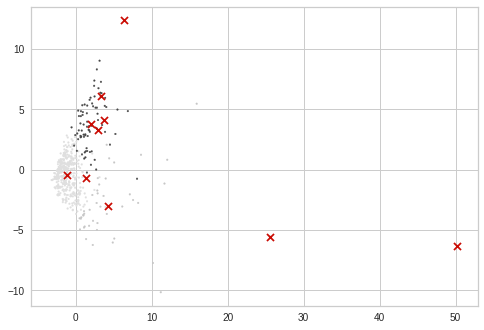

In [23]:
#from https://stackoverflow.com/questions/57902851/what-vectorizer-should-i-use-when-im-doing-clustering-of-text-data
# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(X), s=3)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=50, c='r')
plt.show()

In [24]:
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stop_words)

In [25]:
X = tfv.fit_transform(sents)
words = tfv.get_feature_names()

In [26]:
#setup kmeans clustering
kmeans = KMeans(n_clusters = 5, n_init = 17,  tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(X)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : streep, lindy, meryl, media, chamberlain, australian, baby, sam, neill, dingo
1 : film, one, well, good, great, story, films, like, god, also
2 : movie, one, movies, like, love, film, good, story, seen, see
3 : series, episode, season, stargate, show, episodes, sci, fi, sg, seasons
4 : masks, wang, film, art, china, king, children, pass, story, performer


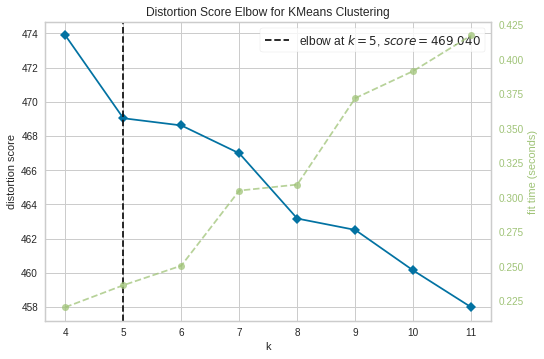

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
#from https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

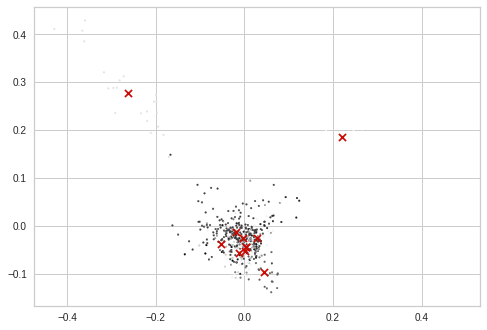

In [28]:
#from https://stackoverflow.com/questions/57902851/what-vectorizer-should-i-use-when-im-doing-clustering-of-text-data
# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(X), s=3)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=50, c='r')
plt.show()